In [1]:
%load_ext autoreload
%autoreload 2

# Environment prep for Colab
 - download git repo 
 - install required pip packages

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#!git clone https://github.com/kkahloots/Rethinking_Data_Effeient_GANs.git

In [4]:
!ls

100-shot-grumpy_cat
100-shot-grumpy_cat.ipynb
100-shot-medici_fountain
100-shot-medici_fountain.ipynb
100-shot-obama
100-shot-obama.ipynb
800-pokemon
800-pokemon.ipynb
monet2photo
monet2photo.ipynb


In [5]:
#!wget https://hanlab.mit.edu/projects/data-efficient-gans/datasets/AnimalFace-cat.zip 

In [6]:
#!mkdir  Rethinking_Data_Effeient_GANs/data/.AnimalFace-cat
#!mkdir  "Rethinking_Data_Effeient_GANs/data/.AnimalFace-cat/1"

In [7]:
#!unzip ./AnimalFace-cat.zip -d "Rethinking_Data_Effeient_GANs/data/.AnimalFace-cat/1"

In [8]:
#!rm -rf ./AnimalFace-cat.zip

# Connect Drive to save and restore results

# Settings

In [9]:
%env TF_KERAS = 1
import os
sep_local = os.path.sep

import sys
print(sep_local)

env: TF_KERAS=1
\


In [10]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [11]:
os.getcwd()

'C:\\Users\\Kriple\\PycharmProjects\\pythonProject\\Rethinking_Data_Effeient_GANs\\notebooks\\3DAugmentationDemo'

In [12]:
os.chdir('../../')
print(os.getcwd())

C:\Users\Kriple\PycharmProjects\pythonProject\Rethinking_Data_Effeient_GANs


# only on colab

# Dataset loading

In [13]:
#!pip install -q colorlog tqdm Augmentor livelossplot

In [14]:
from generators.from_images.file_image_generator import get_generators, create_image_lists

In [15]:
dataset_name='monet2photo'
inputs_shape= image_shape=(256, 256, 3)
batch_size = 36
latents_dim = 256
intermediate_dim = 50
img_dir = 'data/.monet2photo'

In [16]:
restore_path = './saved_models/monet2photo'

In [17]:
from pathlib import Path
Path(restore_path).mkdir(parents=True, exist_ok=True)

In [18]:
import pickle

In [19]:
try:
    imgs_list = pickle.load(open(f'{restore_path}/{dataset_name}_images_list.pkl', 'rb'))
except:
    imgs_list = create_image_lists(
    image_dir=img_dir, 
    validation_pct=0, 
    valid_imgae_formats='jpg')
    pickle.dump(imgs_list, open(f'{restore_path}/{dataset_name}_images_list.pkl', 'wb'))


In [20]:
train_generator, val_generator = get_generators(
        images_list=imgs_list, 
        image_shape=image_shape, 
        image_dir=img_dir,
        batch_size=batch_size,
        episode_len=None,
        episode_shift=None,
        class_mode=None
        )

  INFO     | Found 8231 training files
  INFO     | Found 0 validation files


In [21]:
from utils.utils import img_merge
from PIL import Image
import numpy as np

C:\Users\Kriple\PycharmProjects\pythonProject\Rethinking_Data_Effeient_GANs\utils\utils.py:33: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [22]:
batch = next(train_generator)
image_grid = img_merge(batch.numpy(), n_rows=6).squeeze()

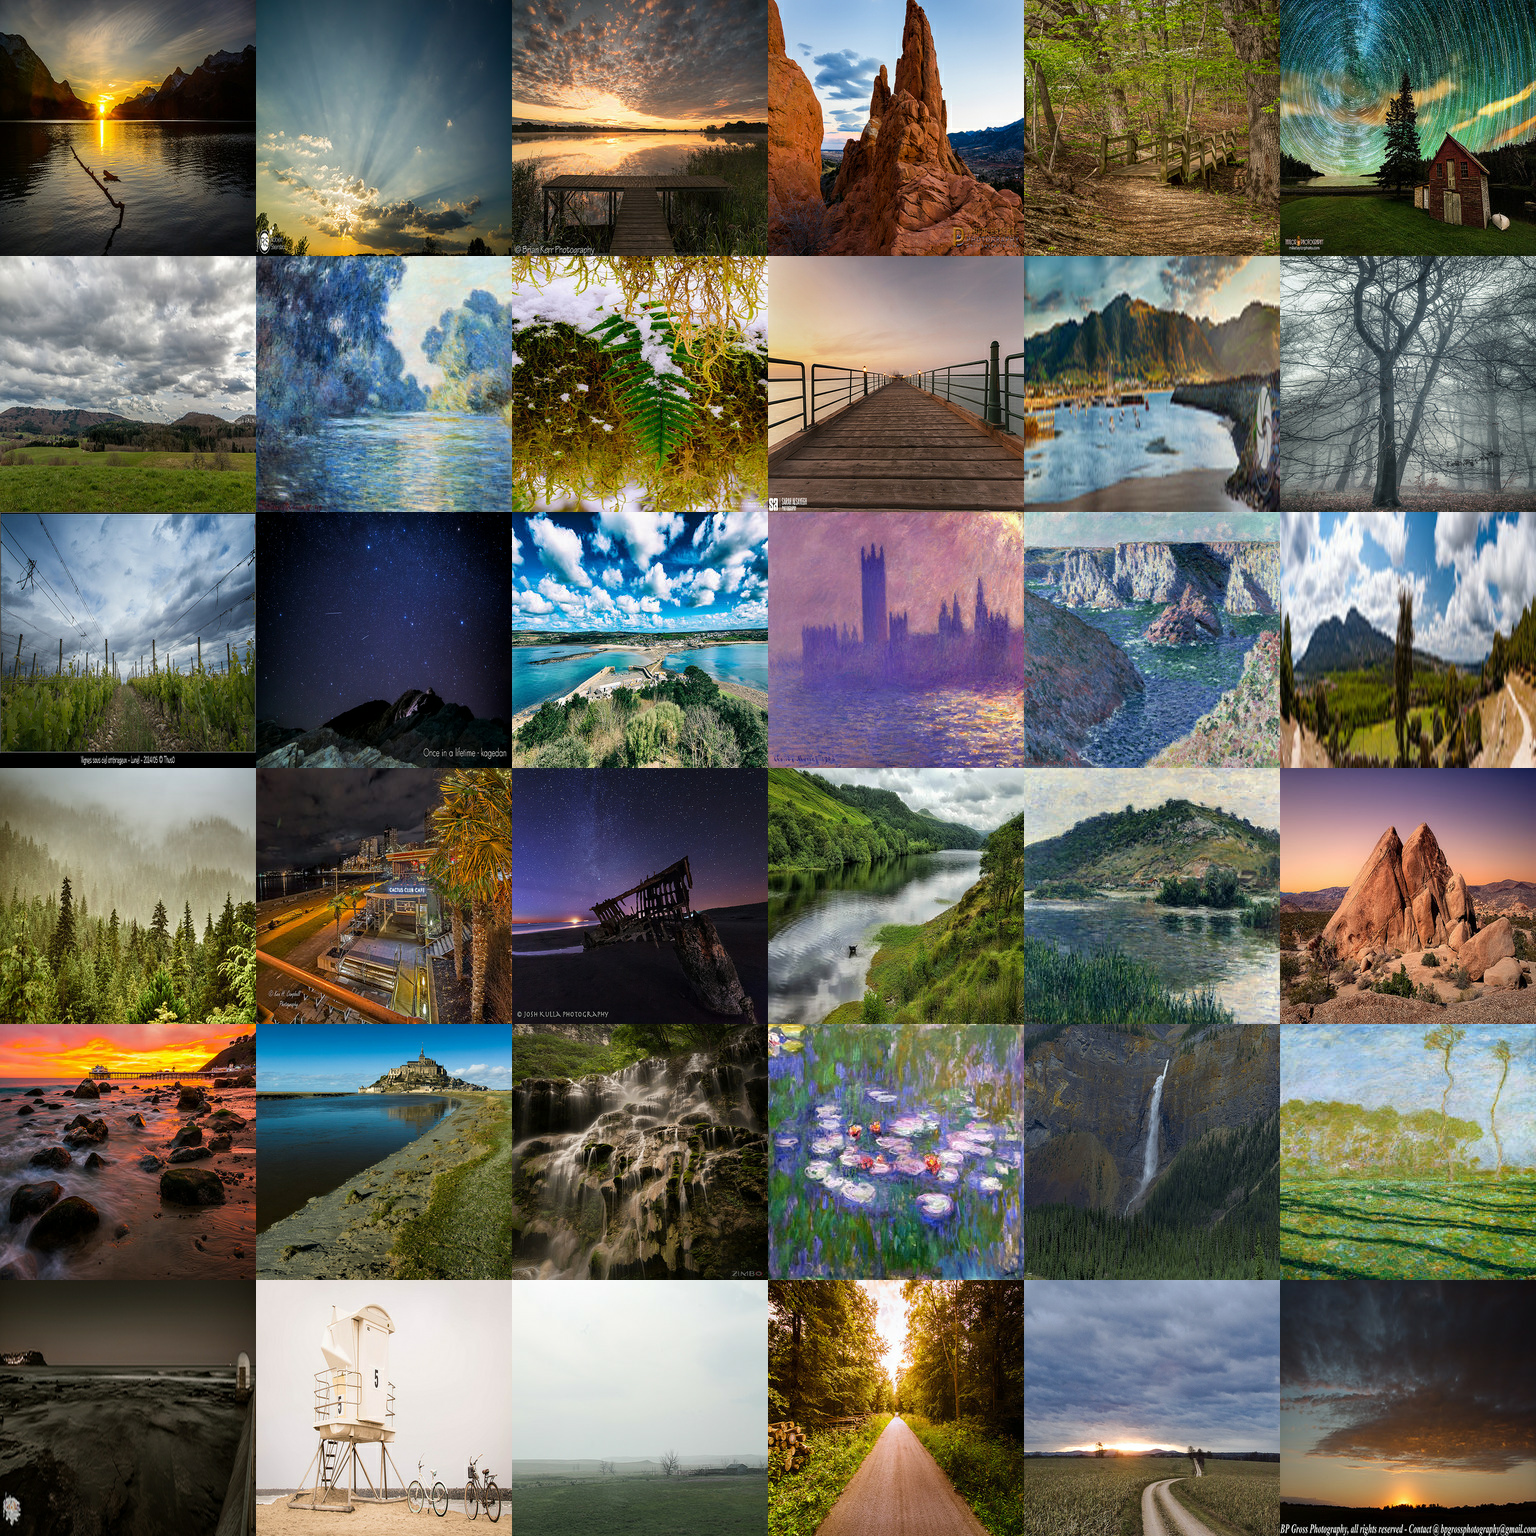

In [23]:
Image.fromarray(image_grid)

In [24]:
from augmentation.Augmentor import augmentation3d_functions, nature_augmentation_functions, augmentation_functions
from tqdm.notebook import tqdm 

In [25]:
import augmentation.ThreeDimension_Presective as td_pres_aug
from augmentation.Augmentor import photo_aug_list

In [26]:
scales = [a/100 for a in range(80, 121)]

In [27]:
import random

In [28]:
photo_aug_list = list(set(photo_aug_list))

In [29]:
for func_list in tqdm(augmentation3d_functions[::-1]):
    print("=======================================")
    aug_batch = batch
    
    done = True
    while done:
        fn = random.choice(func_list)
        if fn in photo_aug_list:
            continue
        else:    
            done = False
            
    aug_patch_fn = lambda x: td_pres_aug.aug_bg_patches(x, scales, fn)
    
    aug_func_name = str([f.__name__ for f in func_list])
    aug_func_name = aug_func_name.replace(fn.__name__, f"3d{fn.__name__}")
    aug_func_name = aug_func_name.replace('[', '').replace(']', '').replace(',', '').replace(' ', '_').replace("'", '')
    print(aug_func_name)
    print()
    
    for f in tqdm(func_list):
        if fn == f:
            aug_batch = aug_patch_fn(aug_batch)
        else:    
            aug_batch = f(aug_batch)
                
    aug_batch = img_merge(aug_batch.numpy(), n_rows=6).squeeze() 
    aug_batch = Image.fromarray(aug_batch)
    aug_batch.save( f"./notebooks/3DAugmentationDemo/{dataset_name}/{aug_func_name}.jpg", "JPEG")
    


3dshear_top_right_clone_add_random_contrast_transform_color_space




add_random_saturation_clone_flip_left_right_3ddistort_random_skew_top_left_random




clone_skew_top_left_random_3dtransform_color_space




clone_skew_left_right_random_distort_random_3dtransform_color_space




shear_down_top_random_clone_3dflip_left_right_add_additive_shade_transform_color_space




clone_add_random_contrast_shear_right_left_random_3dtransform_color_space




clone_skew_top_down_random_flip_left_right_3dtransform_color_space_add_random_contrast




clone_shear_right_left_random_add_additive_shade_3dtransform_color_space




3dskew_left_top_random_clone_flip_left_right_distort_random_transform_color_space




3dshear_left_down_clone_flip_left_right_transform_color_space




flip_left_right_add_random_brightness_distort_random_transform_color_space_3dskew_top_left_random




3dshear_left_down_clone_flip_left_right_add_additive_shade




shear_down_top_random_clone_flip_left_right_3dtransform_color_space_add_random_contrast




skew_down_left_clone_3dflip_left_right_distort_random_add_random_contrast




shear_left_down_clone_3dflip_left_right_add_random_saturation




add_random_saturation_clone_3ddistort_random_transform_color_space_shift_random




3dflip_left_right_add_random_brightness_distort_random_transform_color_space_shear_right_left_random




clone_add_random_saturation_distort_random_3dtransform_color_space




clone_skew_top_down_random_add_additive_shade_3dtransform_color_space




clone_3dskew_left_top_random_distort_random_transform_color_space




clone_skew_down_left_add_random_saturation_3dtransform_color_space




clone_shear_right_left_random_flip_left_right_3ddistort_random




clone_flip_left_right_3dshift_random




clone_shear_down_top_random_add_random_saturation_3dtransform_color_space




clone_3ddistort_random_add_additive_shade_transform_color_space




clone_skew_left_right_random_add_random_saturation_3ddistort_random




clone_3dflip_left_right_add_random_brightness_distort_random_shift_random




clone_3dshear_top_down_random




shear_left_right_random_clone_flip_left_right_add_random_brightness_3ddistort_random




clone_3dshear_down_top_random




clone_add_additive_shade_distort_random_3dtransform_color_space_skew_top_left_random




clone_3dshear_top_down_random_distort_random_transform_color_space




clone_3dshear_right_left_random




3dshear_left_right_random_clone_distort_random




clone_add_random_contrast_3dskew_left_right_random_distort_random




3dshear_left_right_random_clone_flip_left_right




clone_add_additive_shade_3ddistort_random_transform_color_space_shear_right_left_random




clone_skew_top_down_random_3ddistort_random




3dskew_left_top_random_clone_flip_left_right_add_random_brightness_transform_color_space




3dshear_left_right_random_clone_flip_left_right_add_additive_shade_distort_random




clone_add_random_brightness_3ddistort_random_transform_color_space_shear_left_down




flip_left_right_distort_random_3dtransform_color_space_shear_left_down_add_random_contrast




clone_3dflip_left_right_add_additive_shade_transform_color_space_skew_top_left_random




clone_add_random_brightness_3dflip_left_right_skew_down_left




clone_add_random_brightness_3ddistort_random_transform_color_space_skew_top_left_random




clone_add_random_brightness_flip_left_right_3dskew_top_left_random




clone_flip_left_right_add_additive_shade_3dtransform_color_space_shear_right_left_random




3dflip_left_right_add_additive_shade_skew_left_right_random_distort_random_transform_color_space




flip_left_right_add_additive_shade_distort_random_3dtransform_color_space_shear_right_left_random




3dshear_down_top_random_clone_add_random_brightness




clone_3dshift_random_add_additive_shade_transform_color_space




clone_add_random_brightness_3ddistort_random_shift_random




clone_shear_top_down_random_add_random_saturation_3ddistort_random




skew_top_down_random_3dflip_left_right_distort_random_transform_color_space_add_random_contrast




clone_3dskew_top_down_random_flip_left_right_distort_random




shear_down_top_random_clone_3dflip_left_right_distort_random_transform_color_space




clone_3dshear_right_left_random_flip_left_right_transform_color_space




clone_3dshear_right_left_random_flip_left_right_add_additive_shade




clone_flip_left_right_add_additive_shade_3dskew_down_left




clone_distort_random_3dshift_random




clone_3dflip_left_right_transform_color_space_shear_right_left_random_add_random_contrast




clone_3dflip_left_right_shear_top_down_random_add_random_saturation




clone_3dskew_left_right_random_add_random_saturation_transform_color_space




shear_left_down_clone_add_random_contrast_3ddistort_random




shear_left_down_clone_add_random_contrast_3dflip_left_right




clone_shear_top_down_random_3dflip_left_right_add_random_brightness_distort_random




shear_left_right_random_clone_flip_left_right_add_random_brightness_3dtransform_color_space




3dshear_left_down_clone_add_additive_shade




clone_add_random_contrast_3dflip_left_right_shift_random



UnknownError: KeyboardInterrupt: 
Traceback (most recent call last):

  File "C:\ProgramData\Anaconda3\envs\GPUEnv\lib\site-packages\tensorflow\python\ops\script_ops.py", line 242, in __call__
    return func(device, token, args)

  File "C:\ProgramData\Anaconda3\envs\GPUEnv\lib\site-packages\tensorflow\python\ops\script_ops.py", line 131, in __call__
    ret = self._func(*args)

  File "C:\ProgramData\Anaconda3\envs\GPUEnv\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 302, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\Kriple\PycharmProjects\pythonProject\Rethinking_Data_Effeient_GANs\augmentation\ThreeDimension_Presective.py", line 110, in _py_detect_patches
    bg = _color_bg(image, image.copy(), ROIs_sample)

  File "C:\Users\Kriple\PycharmProjects\pythonProject\Rethinking_Data_Effeient_GANs\augmentation\ThreeDimension_Presective.py", line 38, in _color_bg
    bg = cv2.inpaint(bg, mask, radius, flags=cv2.INPAINT_TELEA)

KeyboardInterrupt

 [Op:EagerPyFunc]